In [1]:
import pandas as pd
from nltk.corpus import stopwords


import os, nltk, collections
import collections
from nltk.tokenize import word_tokenize, sent_tokenize
from pprint import pprint


nltk.download('stopwords')

dataset = 'cve_allitems.csv'

# only want to keep the name and the description
all_cves_df = pd.read_csv(dataset)[['Name','Description']]


# descriptions with starting with the double star are not valid.  Disputed, rejected or reserved 
ignore_description = '** '

filtered_cve_df = all_cves_df.loc[(all_cves_df.Description.str.contains(ignore_description, regex=False) == False)]

filtered_cve_df['Description'] = filtered_cve_df['Description'].str.lower()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apridgen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-1-3d3d03cdbf64>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cve_df['Description'] = filtered_cve_df['Description'].str.lower()


In [2]:
working_df = filtered_cve_df.copy()

In [3]:
col = working_df['Description']

In [6]:
x = []
for i in col:
    no_stops = [t for t in word_tokenize(i) if t not in stopwords.words('english')]
    no_stops = [w for w in no_stops if w.isalpha()]
    x.append(" ".join(no_stops))
    


In [7]:
import json

In [10]:
x = [str(i) for i in x]

In [20]:
open('description_serials.json', 'w').write(json.dumps(x, indent=4))

28687245

In [151]:
x = json.load(open('description_serials.json'))

cve_desc = x
cve_col = working_df['Name']
cve_name = [i for i in cve_col]
cve_year = [i.split('-')[1] for i in cve_name]

microsoft_os = ['windows server', 'windows nt', 'windows 7', 'windows 10', 'windows xp', 'windows vista']
microsoft_office = ['microsoft office', 'internet explorer', 'activex', 'powerpoint', 'visio', 'excel', 'outlook']
apple_os = ['ios', 'ipad', 'ipod', 'tv', 'iphone', 'mac os']
apple_products = ['safari', 'webkit', 'itunes', 'facetime', 'quicktime']

opensource_vendors = ['redhat', 'apache', 'mozilla', 'kde', 'gnome', 'openstack', 'eclipse', 'php', 'python', 'linux', 'freebsd', 'mint', 'ubuntu', 'debian', 'ruby']
closedsource_vendors = ['samsung', 'cisco', 'ibm', 'google', 'intel', 'huawei', 'apple', 'vmware', 'lenovo', 'amazon', 'netgear', 'symantec', 'juniper', 'hp', 'mcafee']
all_vendors = opensource_vendors + closedsource_vendors
browsers = ['internet explorer', 'firefox', 'safari', 'chrome', 'opera', 'microsoft edge', 'webkit']

google_os = ['chrome os', 'android', 'appliance', 'chromecast']
google_software = ['chromium', 'google gears', 'google map', 'google chrome os', 'google chrome', 'google talk', 
          'google toolbar', 'google earth', 'google desktop', 'googlemaps', 'google picasa', 
          'google doc', 'google chromecast', 'google web toolkit', 'google authenticator', 
          'google admob', 'google cityhash', 'google spellchecker', ]

adobe_software = ['acrobat', 'framemaker', 'photoshop', 'flash player', 'ebook reader', 'content server', 'svg viewer', 'adobe reader', 'coldfusion', 'document server', 
         'breeze', 'adobe connect', 'creative cloud', 'adobe animate', 'adobe bridge', 'dreamweaver', 'illustrator', 'captivate', 'premiere', 
         'adobe media', 'activex', 'actionscript', 'shockwave']

cisco_os = ['catalyst', 'ios', 'nexus']

cve_microsoft_office = []
cve_microsoft_os = []
cve_browsers = []
cve_browser = []
cve_apple_software = []
cve_apple_mac = []
cve_apple_os = []
cve_apple = []

cve_google_os = []
cve_google_software = []
cve_adobe_software = []
cve_adobe = []

cve_cisco_os = []
cve_cisco_software = []
for d in cve_desc:
    has_cisco = d.find('cisco') > -1
    r = ''
    
    for v in cisco_os:
        if not has_cisco or d.find(v) == -1:
            continue
        r = r+', '+v.replace(' ', '_')
        
    r = r.lstrip(', ')
    cve_cisco_os.append(r)
    if has_cisco and len(r) == 0:
        cve_cisco_software.append('unknown')
    else:
        cve_cisco_software.append('')


cve_java = []
cve_oracle = []
cve_oracle_software = []
for d in cve_desc:
    r = ''
    cve_oracle.append(0 if d.find('oracle') == -1 else 1)
    cve_java.append(0 if d.find('java') == -1 else 1)
    if d.find('oracle') == -1 and d.find('java') == -1:
        cve_oracle_software.append('')
        continue
    elif d.find('java') > -1:
        cve_oracle_software.append('java')
    else:
        cve_oracle_software.append('unknown')


for d in cve_desc:
    r = ''
    has_adobe = d.find('adobe') > -1
        
    for v in adobe_software:
        if not has_adobe or d.find(v) == -1:
            continue
        r = r+', '+v.replace(' ', '_')
        
    r = r.lstrip(', ')
    cve_adobe_software.append(r)
    cve_adobe.append(1 if has_adobe else 0)

for d in cve_desc:
    has_google = d.find('google') > -1

    for v in google_os:
        if not has_google or d.find(v) == -1:
            continue
        r = r+', '+v.replace(' ', '_')
        
    r = r.lstrip(', ')
    cve_google_os.append(r)
    r = ''
    for v in google_software:
        if d.find(v) == -1:
            continue
        if v == 'googlemaps':
            v = 'google map'
        r = r+', '+v.replace(' ', '_')
        
    r = r.lstrip(', ')
    cve_google_software.append(r)


for d in cve_desc:
    has_apple_cve = False
    r = ''
    if d.find('mac os') > -1:
        has_apple_cve = True
        cve_apple_mac.append(1)
    else:
        cve_apple_mac.append(0)
    
    r = ''
    for v in apple_products:
        if d.find(v) == -1:
            continue
        r = r+', '+v.replace(' ', '_')
        has_apple_cve = True
    
    r = r.lstrip(', ')
    cve_apple_software.append(r)
    
    r = ''    
    has_apple = d.find('apple') > -1
    for v in apple_os:
        if not has_apple or d.find(v) == -1:
            continue
        has_apple_cve = True
        r = r+', '+v.replace(' ', '_')
    
    r = r.lstrip(', ')
    cve_apple_os.append(r)
    if has_apple_cve:
        cve_apple.append(1)
    else:
        cve_apple.append(0)
    
    
for d in cve_desc:
    r = ''
    for v in browsers:
        if d.find(v) == -1:
            continue
        r = r+', '+v.replace(' ', '_')
    
    r = r.lstrip(', ')
    cve_browsers.append(r)
    if len(r) > 0:
        cve_browser.append(1)
    else:
        cve_browser.append(0)

cve_browser_microsoft = []
cve_browser_mozilla = []
cve_browser_apple = []
cve_browser_opera = []
cve_browser_google = []

for b in cve_browsers:
    if b.find('safari') > -1 or b.find('webkit') > -1:
        cve_browser_apple.append(1)
    else:
        cve_browser_apple.append(0)

    if b.find('internet_explorer') > -1 or b.find('edge') > -1:
        cve_browser_microsoft.append(1)
    else:
        cve_browser_microsoft.append(0)
        
    if b.find('firefox') > -1:
        cve_browser_mozilla.append(1)
    else:
        cve_browser_mozilla.append(0)
        
    if b.find('chrome') > -1:
        cve_browser_google.append(1)
    else:
        cve_browser_google.append(0)
        
    if b.find('opera') > -1:
        cve_browser_opera.append(1)
    else:
        cve_browser_opera.append(0)


for d in cve_desc:
    r = ''
    for v in microsoft_office:
        if d.find(v) == -1:
            continue
        r = r+', '+v.replace(' ', '_')
    
    r = r.lstrip(', ')
    cve_microsoft_office.append(r)
    r = ''
    for v in microsoft_os:
        if d.find(v) == -1:
            continue
        r = r+', '+v.replace(' ', '_')
        
    cve_microsoft_os.append(r)

cve_microsoft = []
for pos in range(0, len(cve_desc)):
    if cve_microsoft_os[pos] == '' and cve_microsoft_office[pos] == '':
        cve_microsoft.append(0)
    else:
        cve_microsoft.append(1)

vendors = {'cve_'+k:[] for k in all_vendors}
for d in cve_desc:
    for k in all_vendors:
        vendors['cve_'+k].append(0 if d.find(k) == -1 else 1)

vendors['cve_microsoft'] = cve_microsoft
vendors['cve_apple'] = cve_apple
vendors['cve_oracle'] = cve_oracle
vendors['cve_java'] = cve_java
vendors['cve_adobe'] = cve_adobe

cve_other_vendors = []
for pos in range(0, len(cve_desc)):
    other_vendor = 0 if sum([vendors[k][pos] for k in vendors]) > 0 else 1
    cve_other_vendors.append(other_vendor)

vendors['cve_other_vendors'] = cve_other_vendors



cve_products = {
    'cve_browsers_str': cve_browsers, 
    'cve_apple_os_str': cve_apple_os, 
    'cve_apple_software_str': cve_apple_software,
    'cve_microsoft_software_str': cve_microsoft_office,
    'cve_microsoft_os_str': cve_microsoft_os,
    'cve_adobe_software_str': cve_microsoft_os,
    'cve_google_os_str': cve_google_os,
    'cve_google_software_str': cve_google_software,
    'cve_cisco_os_str': cve_cisco_os,
    'cve_cisco_software_str': cve_cisco_software,
    'cve_oracle_software_str': cve_oracle_software,

    'cve_browsers': [1 if len(i) > 0 else 0 for i in cve_browsers], 
    'cve_apple_os': [1 if len(i) > 0 else 0 for i in cve_apple_os], 
    'cve_apple_software': [1 if len(i) > 0 else 0 for i in cve_apple_software],
    'cve_microsoft_software': [1 if len(i) > 0 else 0 for i in cve_microsoft_office],
    'cve_microsoft_os': [1 if len(i) > 0 else 0 for i in cve_microsoft_os],
    'cve_adobe_software': [1 if len(i) > 0 else 0 for i in cve_microsoft_os],
    'cve_google_os': [1 if len(i) > 0 else 0 for i in cve_google_os],
    'cve_google_software': [1 if len(i) > 0 else 0 for i in cve_google_software],
    'cve_cisco_os': [1 if len(i) > 0 else 0 for i in cve_cisco_os],
    'cve_cisco_software': [1 if len(i) > 0 else 0 for i in cve_cisco_software],
    'cve_oracle_software': [1 if len(i) > 0 else 0 for i in cve_oracle_software],
    
    'cve_browser_microsoft': cve_browser_microsoft,
    'cve_browser_mozilla': cve_browser_mozilla,
    'cve_browser_apple': cve_browser_apple,
    'cve_browser_opera': cve_browser_opera,
    'cve_browser_google': cve_browser_google,
}


In [152]:
print(len(cve_browser_microsoft))

cve_data_set = {'name':cve_name, 'year':cve_year, 'description': cve_desc}
cve_data_set.update(vendors)
cve_data_set.update(cve_products)

# for k in cve_products:
#     print(k, len(cve_products[k]))
# for k in vendors:
#     print(k, len(vendors[k]))
    
cve_df = pd.DataFrame(cve_data_set)


150096


In [201]:

def rename_columns_groupby_sum(df, col_dict, gbv, columns):
    _df = df.copy()
    _df.rename(columns = col_dict, inplace = True)
    _df = _df.groupby([gbv]).sum()[[i for i in columns]].copy()
    return _df

programming = rename_columns_groupby_sum(cve_df, 
                                         {"year":"Year", 'cve_java':"Java", 'cve_python':"Python", 'cve_php':"PHP", 'cve_ruby':"Ruby"}, 
                                         'Year', 
                                        ['Java', 'Python', 'PHP', 'Ruby'])

vendor_software = rename_columns_groupby_sum(cve_df, 
                                         {"year":"Year", 
                                          "cve_apple_software":"Apple", "cve_microsoft_software":"Microsoft", 
                                          "cve_adobe_software":"Adobe", "cve_google_software":"Google", 
                                          "cve_oracle_software":"Oracle", "cve_cisco_software":"Cisco"}, 
                                         'Year', 
                                        ["Apple", "Microsoft", "Google", "Oracle", "Cisco"])

vendor_os = rename_columns_groupby_sum(cve_df, 
                                         {"year":"Year", 
                                          "cve_apple_os":"Apple", "cve_microsoft_os":"Microsoft", 
                                          "cve_linux":"Linux", "cve_google_os":"Google", "cve_cisco_os":"Cisco"}, 
                                         'Year', 
                                        ["Apple", "Microsoft", "Google", "Linux", "Cisco"])


vendor_all = rename_columns_groupby_sum(cve_df, 
                                         {"year":"Year", 
                                          "cve_apple":"Apple", "cve_microsoft":"Microsoft", 
                                          "cve_adobe":"Adobe", "cve_google":"Google", "cve_oracle":"Oracle",
                                          "cve_cisco":"Cisco"}, 
                                         'Year', 
                                        ["Apple", "Microsoft", "Google", "Oracle", "Cisco", "Adobe"])


browsers = rename_columns_groupby_sum(cve_df, 
                                         {"year":"Year", 
                                          "cve_browser_apple":"Apple", "cve_browser_microsoft":"Microsoft", 
                                          "cve_browser_google":"Google", "cve_browser_opera":"Opera",
                                          "cve_browser_mozilla":"Mozilla"}, 
                                         'Year', 
                                        ["Apple", "Microsoft", "Google", "Mozilla", "Opera"])

# programming['Java'] = programming['cve_java']
# programming['Python'] = programming['cve_python']
# programming['PHP'] = programming['cve_php']
# programming['Ruby'] = programming['cve_ruby']


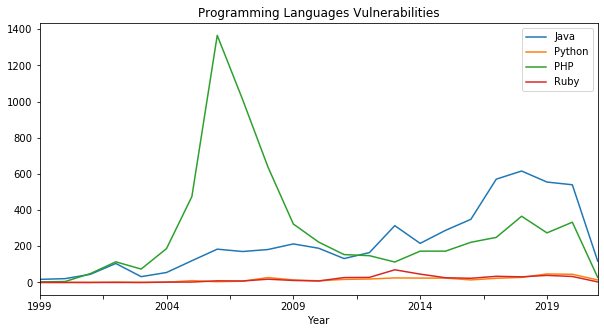

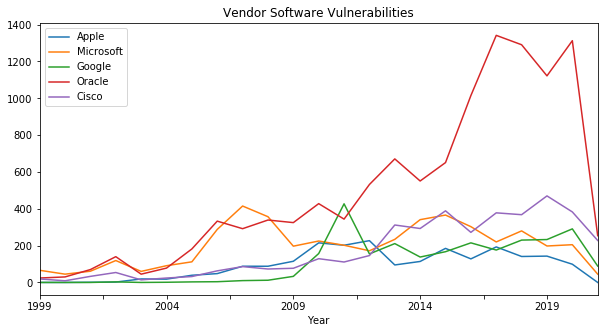

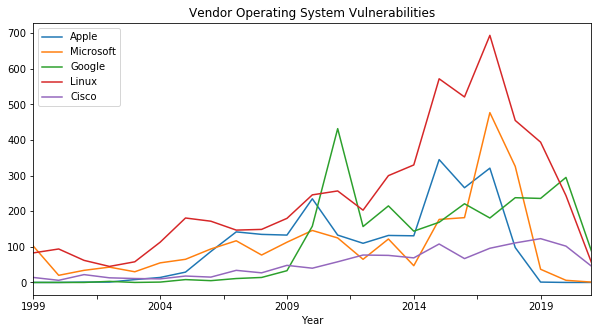

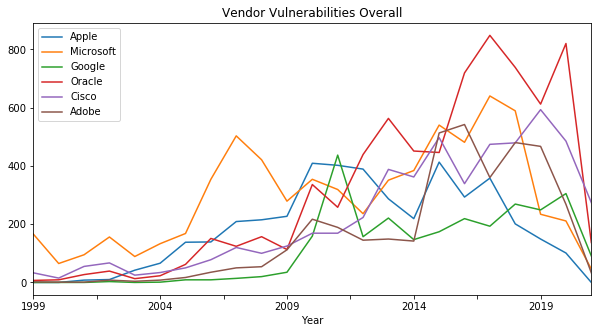

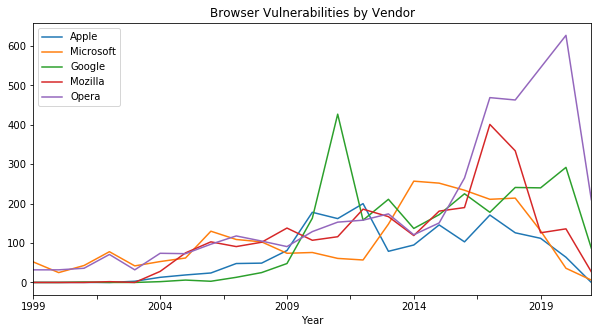

In [203]:
# Look at Java, Python, PHP

programming.plot.line(title='Programming Languages Vulnerabilities', figsize=(10, 5))
vendor_software.plot.line(title='Vendor Software Vulnerabilities', figsize=(10, 5))
vendor_os.plot.line(title='Vendor Operating System Vulnerabilities', figsize=(10, 5))
vendor_all.plot.line(title='Vendor Vulnerabilities Overall', figsize=(10, 5))
browsers.plot.line(title='Browser Vulnerabilities by Vendor', figsize=(10, 5))
